In [1]:
import pandas as pd
import gensim 
import numpy as np
import keras
from gensim.models import KeyedVectors
from gensim.parsing.preprocessing import remove_stopwords
embedding_size = 300
max_words = 5000
max_review_length = 70
prop_val = 0.2  
data = pd.read_csv('C:/Users/redpl/Desktop/archive/tweet_emotions.csv')
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


In [2]:
print(data.shape)

(40000, 3)


In [3]:
print(data.shape[0])

40000


In [4]:
#print(data.sentiment.unique().tolist())
data = data[data["sentiment"] != "empty"];
data = data[data["sentiment"] != "boredom"];
data = data[data["sentiment"] != "enthusiasm"];
data = data[data["sentiment"] != "anger"];
data = data[data["sentiment"] != "relief"];
data = data[data["sentiment"] != "neutral"];
data = data[data["sentiment"] != "surprise"];
data = data[data["sentiment"] != "fun"];
print(data.sentiment.unique().tolist())
    

['sadness', 'worry', 'love', 'hate', 'happiness']


In [5]:
totalRows = len(data.tweet_id)
print(totalRows)

23998


In [6]:
import re
sentiment = []
tweet = []
for i in range(totalRows): 
    tweet_val = data.iloc[i, 2]
    tweet_val = remove_stopwords(tweet_val)
    tweet_val = re.sub('@[\w]+','',tweet_val)
    tweet_tokenised = gensim.utils.simple_preprocess(tweet_val)
    print("-------tweet--------")
    print(tweet_val)
    print("-------tokenised--------")
    print(tweet_tokenised)
    tweet.append(tweet_tokenised)
    sentiment.append(data.iloc[i, 1])
    

-------tweet--------
Layin n bed headache ughhhh...waitin call...
-------tokenised--------
['layin', 'bed', 'headache', 'ughhhh', 'waitin', 'call']
-------tweet--------
Funeral ceremony...gloomy friday...
-------tokenised--------
['funeral', 'ceremony', 'gloomy', 'friday']
-------tweet--------
Re-pinging : didn't prom? BC bf didn't like friends
-------tokenised--------
['re', 'pinging', 'didn', 'prom', 'bc', 'bf', 'didn', 'like', 'friends']
-------tweet--------
I sleep, im not! thinking old friend I want. he's married now. damn, &amp; wants 2! scandalous!
-------tokenised--------
['sleep', 'im', 'not', 'thinking', 'old', 'friend', 'want', 'he', 'married', 'now', 'damn', 'amp', 'wants', 'scandalous']
-------tweet--------
Hmmm. http://www.djhero.com/
-------tokenised--------
['hmmm', 'http', 'www', 'djhero', 'com']
-------tweet--------
 Charlene love. I miss
-------tokenised--------
['charlene', 'love', 'miss']
-------tweet--------
 I'm sorry it's Friday?
-------tokenised--------
['sorry

-------tokenised--------
['girls', 'confusing']
-------tweet--------
@ lyrically_Me Why me?!
-------tokenised--------
['lyrically_me', 'why', 'me']
-------tweet--------
 see...u shouldn't comin' 4 city, u comin' 4
-------tokenised--------
['see', 'shouldn', 'comin', 'city', 'comin']
-------tweet--------
Blackout city good
-------tokenised--------
['blackout', 'city', 'good']
-------tweet--------
 . Flights booked, plus GGD2 1st birthday. Can't miss ! especially missed GGD1
-------tokenised--------
['flights', 'booked', 'plus', 'ggd', 'st', 'birthday', 'can', 'miss', 'especially', 'missed', 'ggd']
-------tweet--------
 Where I live, small markets deliver day-old bread food bank, times tough,
-------tokenised--------
['where', 'live', 'small', 'markets', 'deliver', 'day', 'old', 'bread', 'food', 'bank', 'times', 'tough']
-------tweet--------
I drunk hickups. I pretty laid back, great night. But I can't help mad situation I
-------tokenised--------
['drunk', 'hickups', 'pretty', 'laid', '

Using tiffys computer...it feels different mine... touch different.
-------tokenised--------
['using', 'tiffys', 'computer', 'it', 'feels', 'different', 'mine', 'touch', 'different']
-------tweet--------
 he's logging yet. doubt check replies twitter. trying!
-------tokenised--------
['he', 'logging', 'yet', 'doubt', 'check', 'replies', 'twitter', 'trying']
-------tweet--------
Bummed I missing rock climbing trip week
-------tokenised--------
['bummed', 'missing', 'rock', 'climbing', 'trip', 'week']
-------tweet--------
Stuck shitty traffic! This day going crap
-------tokenised--------
['stuck', 'shitty', 'traffic', 'this', 'day', 'going', 'crap']
-------tweet--------
sick stomach.. headache.. wish come rub temples.
-------tokenised--------
['sick', 'stomach', 'headache', 'wish', 'come', 'rub', 'temples']
-------tweet--------
I want sleep butmy eyes won't let
-------tokenised--------
['want', 'sleep', 'butmy', 'eyes', 'won', 'let']
-------tweet--------
Not good start day left money hom

Y AM I STILL AWAKE!!!! SMH.... THIS SUCKS!!!
-------tokenised--------
['am', 'still', 'awake', 'smh', 'this', 'sucks']
-------tweet--------
having headache colds...
-------tokenised--------
['having', 'headache', 'colds']
-------tweet--------
This headache killing I need cover boring police event.
-------tokenised--------
['this', 'headache', 'killing', 'need', 'cover', 'boring', 'police', 'event']
-------tweet--------
Another night sleeping
-------tokenised--------
['another', 'night', 'sleeping']
-------tweet--------
, ,   think come home
-------tokenised--------
['think', 'come', 'home']
-------tweet--------
You guys dont drunk
-------tokenised--------
['you', 'guys', 'dont', 'drunk']
-------tweet--------
This place blows! My UberTwitter isn't functioning here! Had switch TB
-------tokenised--------
['this', 'place', 'blows', 'my', 'ubertwitter', 'isn', 'functioning', 'here', 'had', 'switch', 'tb']
-------tweet--------
 Too details !!! (But glad better)
-------tokenised--------
['to

-------tweet--------
later normal morning, got attacked swarm mini fly's opening veranda night took hour rid!!
-------tokenised--------
['later', 'normal', 'morning', 'got', 'attacked', 'swarm', 'mini', 'fly', 'opening', 'veranda', 'night', 'took', 'hour', 'rid']
-------tweet--------
Leaving Paris tonight. Trying cram assignments week days. I think I'm half done, I hope.
-------tokenised--------
['leaving', 'paris', 'tonight', 'trying', 'cram', 'assignments', 'week', 'days', 'think', 'half', 'done', 'hope']
-------tweet--------
it's comforting know LDN people working beautiful day skin cancer.... I want office
-------tokenised--------
['it', 'comforting', 'know', 'ldn', 'people', 'working', 'beautiful', 'day', 'skin', 'cancer', 'want', 'office']
-------tweet--------
 It app changed wallpaper random intervals. It's hard good wallpapers.
-------tokenised--------
['it', 'app', 'changed', 'wallpaper', 'random', 'intervals', 'it', 'hard', 'good', 'wallpapers']
-------tweet--------
red updat

-------tweet--------
 No. I thinking I miss T-Dub.
-------tokenised--------
['no', 'thinking', 'miss', 'dub']
-------tweet--------
 What's sad I actually google term. That sucks, tho.
-------tokenised--------
['what', 'sad', 'actually', 'google', 'term', 'that', 'sucks', 'tho']
-------tweet--------
 soooooo wish could, im school myspace completely blocked
-------tokenised--------
['soooooo', 'wish', 'could', 'im', 'school', 'myspace', 'completely', 'blocked']
-------tweet--------
 Thank shout out..when time chat come back! I miss terribly
-------tokenised--------
['thank', 'shout', 'out', 'when', 'time', 'chat', 'come', 'back', 'miss', 'terribly']
-------tweet--------
sick + life i'm going good want + need be. xoxoxo &lt;/3
-------tokenised--------
['sick', 'life', 'going', 'good', 'want', 'need', 'be', 'xoxoxo', 'lt']
-------tweet--------
wants smoke cig doesn't lighter.
-------tokenised--------
['wants', 'smoke', 'cig', 'doesn', 'lighter']
-------tweet--------
 know! This season zoom

-------tweet--------
Reading taking notes undertanding ... HELP!
-------tokenised--------
['reading', 'taking', 'notes', 'undertanding', 'help']
-------tweet--------
worms escaped died bums!
-------tokenised--------
['worms', 'escaped', 'died', 'bums']
-------tweet--------
Dam 5 votes gonna win
-------tokenised--------
['dam', 'votes', 'gonna', 'win']
-------tweet--------
feels I hate guys grrrr
-------tokenised--------
['feels', 'hate', 'guys', 'grrrr']
-------tweet--------
real stressed
-------tokenised--------
['real', 'stressed']
-------tweet--------
My twitterberry wont work friends
-------tokenised--------
['my', 'twitterberry', 'wont', 'work', 'friends']
-------tweet--------
 sucks!
-------tokenised--------
['sucks']
-------tweet--------
 sorry - didnt mean hope think positivly 80 looking 30!
-------tokenised--------
['sorry', 'didnt', 'mean', 'hope', 'think', 'positivly', 'looking']
-------tweet--------
I'm sick! sucks! IM me! ohbabayy33
-------tokenised--------
['sick', 'sucks

-------tweet--------
I'm busy work today...it interferring socializing
-------tokenised--------
['busy', 'work', 'today', 'it', 'interferring', 'socializing']
-------tweet--------
 *waves OK again*
-------tokenised--------
['waves', 'ok', 'again']
-------tweet--------
TGIF! What morning! It's non-stop &amp; I need coffee. Stayed late night trying todays work done. Didn't work
-------tokenised--------
['tgif', 'what', 'morning', 'it', 'non', 'stop', 'amp', 'need', 'coffee', 'stayed', 'late', 'night', 'trying', 'todays', 'work', 'done', 'didn', 'work']
-------tweet--------
Broke Up girlfriend, FEELING Very lonely heartbroken Sad times guys (N)
-------tokenised--------
['broke', 'up', 'girlfriend', 'feeling', 'very', 'lonely', 'heartbroken', 'sad', 'times', 'guys']
-------tweet--------
 I totally agree. I don't like everybody closes windows buses, trains etc. I'm afraid getting diseases
-------tokenised--------
['totally', 'agree', 'don', 'like', 'everybody', 'closes', 'windows', 'buses',

-------tweet--------
Aaaaahhhh.... Friday!!!! but....... Funeral 5
-------tokenised--------
['aaaaahhhh', 'friday', 'but', 'funeral']
-------tweet--------
 lol... i've Bk year... going 2 u haven't come yet!!!
-------tokenised--------
['lol', 've', 'bk', 'year', 'going', 'haven', 'come', 'yet']
-------tweet--------
I told andrew JT going cameo @ MTV movie awards. He said, &quot;he's pissing off.&quot; guess they're fight
-------tokenised--------
['told', 'andrew', 'jt', 'going', 'cameo', 'mtv', 'movie', 'awards', 'he', 'said', 'quot', 'he', 'pissing', 'off', 'quot', 'guess', 'they', 're', 'fight']
-------tweet--------
 Hope better weekend then..
-------tokenised--------
['hope', 'better', 'weekend', 'then']
-------tweet--------
 Oi, I ran problem good fix, there's app utilities called &quot;Grab&quot; works good enough...
-------tokenised--------
['oi', 'ran', 'problem', 'good', 'fix', 'there', 'app', 'utilities', 'called', 'quot', 'grab', 'quot', 'works', 'good', 'enough']
-------tweet

-------tokenised--------
['fact', 'bad', 'cook', 'ships', 'weren', 'cooked', 'chicken']
-------tweet--------
 awful. Xxxx
-------tokenised--------
['awful', 'xxxx']
-------tweet--------
At work punchy early morning pager events.
-------tokenised--------
['at', 'work', 'punchy', 'early', 'morning', 'pager', 'events']
-------tweet--------
I saw sun..... I blink gone
-------tokenised--------
['saw', 'sun', 'blink', 'gone']
-------tweet--------
 ahh closed
-------tokenised--------
['ahh', 'closed']
-------tweet--------
My cankle sore.
-------tokenised--------
['my', 'cankle', 'sore']
-------tweet--------
About meds I percentage back... feeling worse
-------tokenised--------
['about', 'meds', 'percentage', 'back', 'feeling', 'worse']
-------tweet--------
 : ne, muss noch 2 Woche warten
-------tokenised--------
['ne', 'muss', 'noch', 'woche', 'warten']
-------tweet--------
  GRR! stupid meebo disconnecting 5 seconds
-------tokenised--------
['grr', 'stupid', 'meebo', 'disconnecting', 'second

enjoying great sunshine.. indoors.. I don't feel good today
-------tokenised--------
['enjoying', 'great', 'sunshine', 'indoors', 'don', 'feel', 'good', 'today']
-------tweet--------
 checked hubster I think we'll pass -- feeling lazy caravan running friends.
-------tokenised--------
['checked', 'hubster', 'think', 'we', 'll', 'pass', 'feeling', 'lazy', 'caravan', 'running', 'friends']
-------tweet--------
I'm  today. 3 wrong answers row. My brain's working today.
-------tokenised--------
['today', 'wrong', 'answers', 'row', 'my', 'brain', 'working', 'today']
-------tweet--------
instead laying 90 degrees i've gotta 32 fourth graders miso/rice/sushi/mochi hour fml
-------tokenised--------
['instead', 'laying', 'degrees', 've', 'gotta', 'fourth', 'graders', 'miso', 'rice', 'sushi', 'mochi', 'hour', 'fml']
-------tweet--------
doesnt want exams week
-------tokenised--------
['doesnt', 'want', 'exams', 'week']
-------tweet--------
Damn, looks like USB card reader I got Dealextreme doesn't

['apologies', 'don', 'fix', 'hurt', 'feelings', 'kev', 'll', 'time']
-------tweet--------
sick went bed, woke feeling dead
-------tokenised--------
['sick', 'went', 'bed', 'woke', 'feeling', 'dead']
-------tweet--------
LA unified summer schools drastically cut CA budget cuts. Very sad
-------tokenised--------
['la', 'unified', 'summer', 'schools', 'drastically', 'cut', 'ca', 'budget', 'cuts', 'very', 'sad']
-------tweet--------
 Yo, happened invite?
-------tokenised--------
['yo', 'happened', 'invite']
-------tweet--------
 oh no!! wish lay sun!! garden...LOL
-------tokenised--------
['oh', 'no', 'wish', 'lay', 'sun', 'garden', 'lol']
-------tweet--------
want starbucks right needing tonight..
-------tokenised--------
['want', 'starbucks', 'right', 'needing', 'tonight']
-------tweet--------
 OOC sorry missing other...
-------tokenised--------
['ooc', 'sorry', 'missing', 'other']
-------tweet--------
 Hey, Maria! I'm sorry! I think I accidentally disconnected you. Thank SO trying. Head

im sooo sore... hurts, legs weak, im dehydrated. set moms furniture... gay!!!!
-------tokenised--------
['im', 'sooo', 'sore', 'hurts', 'legs', 'weak', 'im', 'dehydrated', 'set', 'moms', 'furniture', 'gay']
-------tweet--------
Got shopping wife Tesco's. I knew day going well.
-------tokenised--------
['got', 'shopping', 'wife', 'tesco', 'knew', 'day', 'going', 'well']
-------tweet--------
 phne blocks text
-------tokenised--------
['phne', 'blocks', 'text']
-------tweet--------
Stupid idiot ran stop sing killed car!
-------tokenised--------
['stupid', 'idiot', 'ran', 'stop', 'sing', 'killed', 'car']
-------tweet--------
laptop pooped. new harddrive needed? DH's old pc now. maybe offline damn BSOD!! happened times, Safe Mode
-------tokenised--------
['laptop', 'pooped', 'new', 'harddrive', 'needed', 'dh', 'old', 'pc', 'now', 'maybe', 'offline', 'damn', 'bsod', 'happened', 'times', 'safe', 'mode']
-------tweet--------
$4 lonestar pitchers  ? If I wasn't recovering weekend's bout irrespo

-------tweet--------
 noo I'm miami I wanna lay sun..but rain stopped
-------tokenised--------
['noo', 'miami', 'wanna', 'lay', 'sun', 'but', 'rain', 'stopped']
-------tweet--------
hates sound silence..doesnt like shut out..
-------tokenised--------
['hates', 'sound', 'silence', 'doesnt', 'like', 'shut', 'out']
-------tweet--------
Got early shit ton im headed cherokee park run walk !
-------tokenised--------
['got', 'early', 'shit', 'ton', 'im', 'headed', 'cherokee', 'park', 'run', 'walk']
-------tweet--------
My arms making want cry... shots sick
-------tokenised--------
['my', 'arms', 'making', 'want', 'cry', 'shots', 'sick']
-------tweet--------
@ jimithy1: can't come msbj&lt;3
-------tokenised--------
['jimithy', 'can', 'come', 'msbj', 'lt']
-------tweet--------
 I twitter
-------tokenised--------
['twitter']
-------tweet--------
 miss place, miss wegmans more. foods != wegmans
-------tokenised--------
['miss', 'place', 'miss', 'wegmans', 'more', 'foods', 'wegmans']
-------tweet-

-------tweet--------
http://twitpic.com/676tn - Home Sweet Home... I didn't picnic blanket
-------tokenised--------
['http', 'twitpic', 'com', 'tn', 'home', 'sweet', 'home', 'didn', 'picnic', 'blanket']
-------tweet--------
What u dont 
-------tokenised--------
['what', 'dont']
-------tweet--------
Wife &amp; I split duties tonight.Wife headed OSU daughter's ath trng rcption. I'm son #1's school paper banquet.Can't both.
-------tokenised--------
['wife', 'amp', 'split', 'duties', 'tonight', 'wife', 'headed', 'osu', 'daughter', 'ath', 'trng', 'rcption', 'son', 'school', 'paper', 'banquet', 'can', 'both']
-------tweet--------
Somebody buy plane ticket home!! I miss girl...
-------tokenised--------
['somebody', 'buy', 'plane', 'ticket', 'home', 'miss', 'girl']
-------tweet--------
Where sun!!
-------tokenised--------
['where', 'sun']
-------tweet--------
 I fee pain lady Ga Ga It drive insane oh dear God songs head
-------tokenised--------
['fee', 'pain', 'lady', 'ga', 'ga', 'it', 'drive'

['haha', 'want', 'bagel', 'blueberry', 'cream', 'cheese', 'left', 'bagel']
-------tweet--------
it's friday work weekend
-------tokenised--------
['it', 'friday', 'work', 'weekend']
-------tweet--------
 Haaaayley, saw pictures tour, you're pretty *-* wanted u guys
-------tokenised--------
['haaaayley', 'saw', 'pictures', 'tour', 'you', 're', 'pretty', 'wanted', 'guys']
-------tweet--------
I'm going Zydrate Anatomy stuck head rest life. It makes miss Chelsea. She liked Graverobber.
-------tokenised--------
['going', 'zydrate', 'anatomy', 'stuck', 'head', 'rest', 'life', 'it', 'makes', 'miss', 'chelsea', 'she', 'liked', 'graverobber']
-------tweet--------
Graduating high school tonight im kind sad..
-------tokenised--------
['graduating', 'high', 'school', 'tonight', 'im', 'kind', 'sad']
-------tweet--------
there's cherry dr. pepper left fridge...thank God. im addicted stuff sad things skin.
-------tokenised--------
['there', 'cherry', 'dr', 'pepper', 'left', 'fridge', 'thank', 'god',

-------tokenised--------
['ahhh', 'think', 'legs', 'burnt', 'hurt']
-------tweet--------
Ugh, hate waiting airports. I couldn't seat near outlet either.
-------tokenised--------
['ugh', 'hate', 'waiting', 'airports', 'couldn', 'seat', 'near', 'outlet', 'either']
-------tweet--------
nice hair
-------tokenised--------
['nice', 'hair']
-------tweet--------
I think I messed back, like day
-------tokenised--------
['think', 'messed', 'back', 'like', 'day']
-------tweet--------
I missed  announcement Something flow concert? Can in?
-------tokenised--------
['missed', 'announcement', 'something', 'flow', 'concert', 'can', 'in']
-------tweet--------
 day life lately. feel ya girl &lt;3
-------tokenised--------
['day', 'life', 'lately', 'feel', 'ya', 'girl', 'lt']
-------tweet--------
Feel depressed I couldn't save it... Thanks nothing!
-------tokenised--------
['feel', 'depressed', 'couldn', 'save', 'it', 'thanks', 'nothing']
-------tweet--------
Phew long day havent gotten work
-------tokeni

-------tokenised--------
['aw']
-------tweet--------
Sitting computer... I study... But I'm right now, I'm procrastinating again! XD
-------tokenised--------
['sitting', 'computer', 'study', 'but', 'right', 'now', 'procrastinating', 'again', 'xd']
-------tweet--------
I don't feel good. .My throat hurts!!!!
-------tokenised--------
['don', 'feel', 'good', 'my', 'throat', 'hurts']
-------tweet--------
 Only Tao summer?? That
-------tokenised--------
['only', 'tao', 'summer', 'that']
-------tweet--------
http://twitpic.com/67di2 - This I meant I said skin terrible. Plus sunburnt chest.
-------tokenised--------
['http', 'twitpic', 'com', 'di', 'this', 'meant', 'said', 'skin', 'terrible', 'plus', 'sunburnt', 'chest']
-------tweet--------
working! I ready go.
-------tokenised--------
['working', 'ready', 'go']
-------tweet--------
So tired I work 5pm #fb
-------tokenised--------
['so', 'tired', 'work', 'pm', 'fb']
-------tweet--------

-------tokenised--------
[]
-------tweet--------
 worki

-------tweet--------
ummmm idea im friend pissed dont know hates I NEED HELP BRITNEY plz
-------tokenised--------
['ummmm', 'idea', 'im', 'friend', 'pissed', 'dont', 'know', 'hates', 'need', 'help', 'britney', 'plz']
-------tweet--------
edinburgh. chinese yum! better wee haggis hes cryin dunno y tho xox
-------tokenised--------
['edinburgh', 'chinese', 'yum', 'better', 'wee', 'haggis', 'hes', 'cryin', 'dunno', 'tho', 'xox']
-------tweet--------
 it's sad, i'd love talk live uk can't wait new album, hi xxx
-------tokenised--------
['it', 'sad', 'love', 'talk', 'live', 'uk', 'can', 'wait', 'new', 'album', 'hi', 'xxx']
-------tweet--------
 Re: SWA &amp; Pets - Good news owners, bad news people w/ allergies needed fly $$. Sad I know.
-------tokenised--------
['re', 'swa', 'amp', 'pets', 'good', 'news', 'owners', 'bad', 'news', 'people', 'allergies', 'needed', 'fly', 'sad', 'know']
-------tweet--------
Work till 6..then dreadful tv shopping cause broke
-------tokenised--------
['work', 't

 panic car .....
-------tokenised--------
['panic', 'car']
-------tweet--------
 Sorry. Not unemployed.
-------tokenised--------
['sorry', 'not', 'unemployed']
-------tweet--------
it's sunny i'm bored sad text
-------tokenised--------
['it', 'sunny', 'bored', 'sad', 'text']
-------tweet--------
Just saw boo went work time hair it's going rain WTF
-------tokenised--------
['just', 'saw', 'boo', 'went', 'work', 'time', 'hair', 'it', 'going', 'rain', 'wtf']
-------tweet--------
I live mediterranean food rest life. I miss home
-------tokenised--------
['live', 'mediterranean', 'food', 'rest', 'life', 'miss', 'home']
-------tweet--------
 He played song didn't send request
-------tokenised--------
['he', 'played', 'song', 'didn', 'send', 'request']
-------tweet--------
history project
-------tokenised--------
['history', 'project']
-------tweet--------
i'm kinda sad time miss brother friends suck mean called 2 weeks
-------tokenised--------
['kinda', 'sad', 'time', 'miss', 'brother', 'frie

-------tweet--------
Recovering bad fall lunch. Great start weekend.
-------tokenised--------
['recovering', 'bad', 'fall', 'lunch', 'great', 'start', 'weekend']
-------tweet--------
:'( big brother 4 days! This means constant live tripe e4 scrubs fall asleep to! Not happy
-------tokenised--------
['big', 'brother', 'days', 'this', 'means', 'constant', 'live', 'tripe', 'scrubs', 'fall', 'asleep', 'to', 'not', 'happy']
-------tweet--------
 Poor dear. Your fellow busty mavens there. What gym belong to? PEAC?
-------tokenised--------
['poor', 'dear', 'your', 'fellow', 'busty', 'mavens', 'there', 'what', 'gym', 'belong', 'to', 'peac']
-------tweet--------
 LMOA! quit mine, stress
-------tokenised--------
['lmoa', 'quit', 'mine', 'stress']
-------tweet--------
 I hope it'll quickly possible.
-------tokenised--------
['hope', 'it', 'll', 'quickly', 'possible']
-------tweet--------
 I giveaway.. I wish I known sooner What happens unclaimed cities?
-------tokenised--------
['giveaway', 'wish'

-------tokenised--------
['poor', 'greg', 'stupid', 'uk', 'sympathy', 'vote', 'xo']
-------tweet--------
Needs learn lines show, director going kick butt
-------tokenised--------
['needs', 'learn', 'lines', 'show', 'director', 'going', 'kick', 'butt']
-------tweet--------
 Me But itï¿½s getting better
-------tokenised--------
['me', 'but', 'itï', '½s', 'getting', 'better']
-------tweet--------
My husband went fishing How come knitting keeps home? I need lady hobby lets cooking.
-------tokenised--------
['my', 'husband', 'went', 'fishing', 'how', 'come', 'knitting', 'keeps', 'home', 'need', 'lady', 'hobby', 'lets', 'cooking']
-------tweet--------
I hate waiting lines
-------tokenised--------
['hate', 'waiting', 'lines']
-------tweet--------
My baby busted lip.
-------tokenised--------
['my', 'baby', 'busted', 'lip']
-------tweet--------
 yes - damper &quot;getting know&quot; Georgetown! Instead watching tv I catching invoices.
-------tokenised--------
['yes', 'damper', 'quot', 'getting'

['nooooooo', 'sue', 'retiring', 'no']
-------tweet--------
Low profile tires suck! They won't size monday
-------tokenised--------
['low', 'profile', 'tires', 'suck', 'they', 'won', 'size', 'monday']
-------tweet--------
The Killers Jonathan Ross completely epitomised I love fangirl heart. Seriously wow. I miss Reading, &amp; Dublin
-------tokenised--------
['the', 'killers', 'jonathan', 'ross', 'completely', 'epitomised', 'love', 'fangirl', 'heart', 'seriously', 'wow', 'miss', 'reading', 'amp', 'dublin']
-------tweet--------
 help talk losing fathers makes sad
-------tokenised--------
['help', 'talk', 'losing', 'fathers', 'makes', 'sad']
-------tweet--------
Fuck.. legs sun burned...
-------tokenised--------
['fuck', 'legs', 'sun', 'burned']
-------tweet--------
 I talked Kat, crappy
-------tokenised--------
['talked', 'kat', 'crappy']
-------tweet--------
 My right ear's blocked today bit like you've got water it. Any idea's 2 clear it? don't like putting liquid
-------tokenised-----

-------tweet--------
 gay...u dissappointed past days
-------tokenised--------
['gay', 'dissappointed', 'past', 'days']
-------tweet--------
 I'm sorry car. I feel you...
-------tokenised--------
['sorry', 'car', 'feel', 'you']
-------tweet--------
 NICK WTF I WAS GONNA GO BUT I HAVE NO RIDE. Boo
-------tokenised--------
['nick', 'wtf', 'was', 'gonna', 'go', 'but', 'have', 'no', 'ride', 'boo']
-------tweet--------
Sugarland. So hot outside. hotter northwest?
-------tokenised--------
['sugarland', 'so', 'hot', 'outside', 'hotter', 'northwest']
-------tweet--------
Stupid hand. Have A2 flop nut low pair. But guy low flush. Quartered. 5900.
-------tokenised--------
['stupid', 'hand', 'have', 'flop', 'nut', 'low', 'pair', 'but', 'guy', 'low', 'flush', 'quartered']
-------tweet--------
Is feeling bit lonely
-------tokenised--------
['is', 'feeling', 'bit', 'lonely']
-------tweet--------
sad ending softball season.
-------tokenised--------
['sad', 'ending', 'softball', 'season']
-------tweet

-------tweet--------
A simple nice dinner doesn't exist world.
-------tokenised--------
['simple', 'nice', 'dinner', 'doesn', 'exist', 'world']
-------tweet--------
day school sad
-------tokenised--------
['day', 'school', 'sad']
-------tweet--------
Johnny actually invited movies things concert
-------tokenised--------
['johnny', 'actually', 'invited', 'movies', 'things', 'concert']
-------tweet--------
 She loves ride, doesn't she? Too bad I wasn't recording
-------tokenised--------
['she', 'loves', 'ride', 'doesn', 'she', 'too', 'bad', 'wasn', 'recording']
-------tweet--------
For reason, Corona Light tastes better I I alone. http://twitpic.com/67wa0
-------tokenised--------
['for', 'reason', 'corona', 'light', 'tastes', 'better', 'alone', 'http', 'twitpic', 'com', 'wa']
-------tweet--------
headache
-------tokenised--------
['headache']
-------tweet--------
My dreams crushed...Spock like ladies.
-------tokenised--------
['my', 'dreams', 'crushed', 'spock', 'like', 'ladies']
-------

-------tweet--------
today GOOD , little girl hollie bgt , complete sympahty vote ! cute aidan davis :L? tweet x
-------tokenised--------
['today', 'good', 'little', 'girl', 'hollie', 'bgt', 'complete', 'sympahty', 'vote', 'cute', 'aidan', 'davis', 'tweet']
-------tweet--------
 actually, friend gave files today! lol CDA files... u know convert MP3?
-------tokenised--------
['actually', 'friend', 'gave', 'files', 'today', 'lol', 'cda', 'files', 'know', 'convert', 'mp']
-------tweet--------
omg, NO ICECREAM
-------tokenised--------
['omg', 'no', 'icecream']
-------tweet--------
 Yes. Need listen sad SP-Songs
-------tokenised--------
['yes', 'need', 'listen', 'sad', 'sp', 'songs']
-------tweet--------
I got early pay bills. I figured like bandaid I quickly won't bad... I wrong
-------tokenised--------
['got', 'early', 'pay', 'bills', 'figured', 'like', 'bandaid', 'quickly', 'won', 'bad', 'wrong']
-------tweet--------
 don't feel bad! ill bring surprise
-------tokenised--------
['don', 'f

-------tweet--------
I'd #BEATweetup. Instead, I'm taking cue  shutting down.   reprezent-zent!
-------tokenised--------
['beatweetup', 'instead', 'taking', 'cue', 'shutting', 'down', 'reprezent', 'zent']
-------tweet--------
fab broke
-------tokenised--------
['fab', 'broke']
-------tweet--------
 What it?? Gosh! I missed yesterday live chat.. I bed.. sick
-------tokenised--------
['what', 'it', 'gosh', 'missed', 'yesterday', 'live', 'chat', 'bed', 'sick']
-------tweet--------
I'm traffic jam
-------tokenised--------
['traffic', 'jam']
-------tweet--------
broken iphone
-------tokenised--------
['broken', 'iphone']
-------tweet--------
I finally plugged listen Flashpoints http//:www.kpfa.org shoutout  missed segment Chevron
-------tokenised--------
['finally', 'plugged', 'listen', 'flashpoints', 'http', 'www', 'kpfa', 'org', 'shoutout', 'missed', 'segment', 'chevron']
-------tweet--------
says Morning. http://plurk.com/p/x34ap
-------tokenised--------
['says', 'morning', 'http', 'plur

['maybe', 'trying', 'hack']
-------tweet--------
 play shitty levels :-D I got bit ambitious broke thermometer got half done!
-------tokenised--------
['play', 'shitty', 'levels', 'got', 'bit', 'ambitious', 'broke', 'thermometer', 'got', 'half', 'done']
-------tweet--------
got home nice party, tired
-------tokenised--------
['got', 'home', 'nice', 'party', 'tired']
-------tweet--------
Just friend son fell 25ft shaft concrete today. They alive least. Don't know else.
-------tokenised--------
['just', 'friend', 'son', 'fell', 'ft', 'shaft', 'concrete', 'today', 'they', 'alive', 'least', 'don', 'know', 'else']
-------tweet--------
#myweakness loving ...i let negative people life
-------tokenised--------
['myweakness', 'loving', 'let', 'negative', 'people', 'life']
-------tweet--------
 doesn't pitch
-------tokenised--------
['doesn', 'pitch']
-------tweet--------
wants New Moon. AHH Im going crazy.
-------tokenised--------
['wants', 'new', 'moon', 'ahh', 'im', 'going', 'crazy']
-------t

good morning world
-------tokenised--------
['good', 'morning', 'world']
-------tweet--------
 Hey Wanda great tweet u thx info dobro fantastic sound. Son House fav
-------tokenised--------
['hey', 'wanda', 'great', 'tweet', 'thx', 'info', 'dobro', 'fantastic', 'sound', 'son', 'house', 'fav']
-------tweet--------
 babe text email address send
-------tokenised--------
['babe', 'text', 'email', 'address', 'send']
-------tweet--------
loves Monday May Bank Holiday! http://plurk.com/p/roxar
-------tokenised--------
['loves', 'monday', 'may', 'bank', 'holiday', 'http', 'plurk', 'com', 'roxar']
-------tweet--------
At uni learned I class today. About home
-------tokenised--------
['at', 'uni', 'learned', 'class', 'today', 'about', 'home']
-------tweet--------
I alreay feel hang over. Soooo worth
-------tokenised--------
['alreay', 'feel', 'hang', 'over', 'soooo', 'worth']
-------tweet--------
 David Aaronovitch worth making exception (Good morning, way)
-------tokenised--------
['david', 'aa

-------tweet--------
Listening music, Texting . umm Msn lol. bit bored . lol. Garth Brooks wooo love hehe . &lt;3
-------tokenised--------
['listening', 'music', 'texting', 'umm', 'msn', 'lol', 'bit', 'bored', 'lol', 'garth', 'brooks', 'wooo', 'love', 'hehe', 'lt']
-------tweet--------
 Well, good luck then.
-------tokenised--------
['well', 'good', 'luck', 'then']
-------tweet--------
Thanks follow ... wish ya'll best ;)
-------tokenised--------
['thanks', 'follow', 'wish', 'ya', 'll', 'best']
-------tweet--------
 Oh! Don't love Vodafone series Ads ... The best picturisation
-------tokenised--------
['oh', 'don', 'love', 'vodafone', 'series', 'ads', 'the', 'best', 'picturisation']
-------tweet--------
Happy Birthday husband
-------tokenised--------
['happy', 'birthday', 'husband']
-------tweet--------
 Yeah, it's Myst!
-------tokenised--------
['yeah', 'it', 'myst']
-------tweet--------
 Ah brilliant! Thanks bunch
-------tokenised--------
['ah', 'brilliant', 'thanks', 'bunch']
------

-------tweet--------
Joining twitter! Just added random person
-------tokenised--------
['joining', 'twitter', 'just', 'added', 'random', 'person']
-------tweet--------
Happy Star Wars day
-------tokenised--------
['happy', 'star', 'wars', 'day']
-------tweet--------
 Fresh change hearing write sins hey!!?? Not theres wrong that!
-------tokenised--------
['fresh', 'change', 'hearing', 'write', 'sins', 'hey', 'not', 'theres', 'wrong', 'that']
-------tweet--------
Been working framework web based #SL application. Have product registration, server, login, site, security, &amp; comms
-------tokenised--------
['been', 'working', 'framework', 'web', 'based', 'sl', 'application', 'have', 'product', 'registration', 'server', 'login', 'site', 'security', 'amp', 'comms']
-------tweet--------
Hurray! &quot;Summer-time&quot; starts today, meaning I work 4 pm, instead 4.30. Until August! Yay!
-------tokenised--------
['hurray', 'quot', 'summer', 'time', 'quot', 'starts', 'today', 'meaning', 'work',

['ready', 'school', 'absolute', 'wonderful', 'day']
-------tweet--------
Happy Star Wars Day
-------tokenised--------
['happy', 'star', 'wars', 'day']
-------tweet--------
heyya people!
-------tokenised--------
['heyya', 'people']
-------tweet--------
Happy Star Wars Day!!! May The 4th Be With You!
-------tokenised--------
['happy', 'star', 'wars', 'day', 'may', 'the', 'th', 'be', 'with', 'you']
-------tweet--------
 thanx
-------tokenised--------
['thanx']
-------tweet--------
 I queue cake standing slight look deranged anticipation face.
-------tokenised--------
['queue', 'cake', 'standing', 'slight', 'look', 'deranged', 'anticipation', 'face']
-------tweet--------
Thank much! Hopefully okay Tons kisses ) http://tinyurl.com/dxa8xg
-------tokenised--------
['thank', 'much', 'hopefully', 'okay', 'tons', 'kisses', 'http', 'tinyurl', 'com', 'dxa', 'xg']
-------tweet--------
 Hope it's great ya http://myloc.me/tvD
-------tokenised--------
['hope', 'it', 'great', 'ya', 'http', 'myloc', 'me

-------tweet--------
 ah.. Birmingham! I remember Wrox days
-------tokenised--------
['ah', 'birmingham', 'remember', 'wrox', 'days']
-------tweet--------
loving Mortal Combat right now!
-------tokenised--------
['loving', 'mortal', 'combat', 'right', 'now']
-------tweet--------
home work good night epic dudes dudettes
-------tokenised--------
['home', 'work', 'good', 'night', 'epic', 'dudes', 'dudettes']
-------tweet--------
 good morning broham
-------tokenised--------
['good', 'morning', 'broham']
-------tweet--------
 week delivery OZ, awesome product, awesome prices. The parcel today day
-------tokenised--------
['week', 'delivery', 'oz', 'awesome', 'product', 'awesome', 'prices', 'the', 'parcel', 'today', 'day']
-------tweet--------
 Have fun guys! We're 55 days
-------tokenised--------
['have', 'fun', 'guys', 'we', 're', 'days']
-------tweet--------
4 novos followers http://migre.me/SfN Sorry, account headed suspended strange activity. strange ï¿½ ï¿½timo
-------tokenised-------

['helloooo']
-------tweet--------
Off school tired didnt hear 10 texts night lol !! Still tired love Jesus Christ
-------tokenised--------
['off', 'school', 'tired', 'didnt', 'hear', 'texts', 'night', 'lol', 'still', 'tired', 'love', 'jesus', 'christ']
-------tweet--------
 I`m looking forward hear Norway!! Live fast!
-------tokenised--------
['looking', 'forward', 'hear', 'norway', 'live', 'fast']
-------tweet--------
 fuck it. You don't look well. You home.
-------tokenised--------
['fuck', 'it', 'you', 'don', 'look', 'well', 'you', 'home']
-------tweet--------
Monday I work legs hurting little! Smile
-------tokenised--------
['monday', 'work', 'legs', 'hurting', 'little', 'smile']
-------tweet--------
 HaPPy B-DAY Ma Freaaaaaaak &lt;3
-------tokenised--------
['happy', 'day', 'ma', 'freaaaaaaak', 'lt']
-------tweet--------
After work....Hillcats game! .25 cent hot dogs haha
-------tokenised--------
['after', 'work', 'hillcats', 'game', 'cent', 'hot', 'dogs', 'haha']
-------tweet----

-------tokenised--------
['hmm', 'didn', 'dm', 'sure', 'didn', 'else']
-------tweet--------
Going bed, pain fell shoulder today. Good night
-------tokenised--------
['going', 'bed', 'pain', 'fell', 'shoulder', 'today', 'good', 'night']
-------tweet--------
 Good Morning
-------tokenised--------
['good', 'morning']
-------tweet--------
My SO slooowww morning. I think it's sign I home play yard.
-------tokenised--------
['my', 'so', 'slooowww', 'morning', 'think', 'it', 'sign', 'home', 'play', 'yard']
-------tweet--------
So im playing hooky work feels good Gonna ma hair did! .......i wonder fitzsimmons doing?
-------tokenised--------
['so', 'im', 'playing', 'hooky', 'work', 'feels', 'good', 'gonna', 'ma', 'hair', 'did', 'wonder', 'fitzsimmons', 'doing']
-------tweet--------
 Listened coz reminded me. This depressing. ? http://blip.fm/~5joo9
-------tokenised--------
['listened', 'coz', 'reminded', 'me', 'this', 'depressing', 'http', 'blip', 'fm', 'joo']
-------tweet--------
 Loved runnin

 time-warner? talk AOL. presentation warner bros.
-------tokenised--------
['time', 'warner', 'talk', 'aol', 'presentation', 'warner', 'bros']
-------tweet--------
lmao...ummmm nothing...
-------tokenised--------
['lmao', 'ummmm', 'nothing']
-------tweet--------
 Glad happy!
-------tokenised--------
['glad', 'happy']
-------tweet--------
 That's true I believe staff sick Mondays Fridays - LOL!
-------tokenised--------
['that', 'true', 'believe', 'staff', 'sick', 'mondays', 'fridays', 'lol']
-------tweet--------
 http://twitpic.com/4jk42 hey Gi! look pic frankie took southend gig!
-------tokenised--------
['http', 'twitpic', 'com', 'jk', 'hey', 'gi', 'look', 'pic', 'frankie', 'took', 'southend', 'gig']
-------tweet--------
allo! twitterville! morning...hope great weekend pretty good! monday (blah) !!!!
-------tokenised--------
['allo', 'twitterville', 'morning', 'hope', 'great', 'weekend', 'pretty', 'good', 'monday', 'blah']
-------tweet--------
let match cancelled today. PLEASE
-------

-------tweet--------
Well enter 0s Individual SSN/ITIN EIN according Apple. Hurray!
-------tokenised--------
['well', 'enter', 'individual', 'ssn', 'itin', 'ein', 'according', 'apple', 'hurray']
-------tweet--------
it's 3 AM.!! I think it's time bed.!! good night twitts.! ;))
-------tokenised--------
['it', 'am', 'think', 'it', 'time', 'bed', 'good', 'night', 'twitts']
-------tweet--------
 wellll...... 2 feed mainly shade loving native wildflowers.
-------tokenised--------
['wellll', 'feed', 'mainly', 'shade', 'loving', 'native', 'wildflowers']
-------tweet--------
 I Hope You're Okay.Do What Beyonce Do...
-------tokenised--------
['hope', 'you', 're', 'okay', 'do', 'what', 'beyonce', 'do']
-------tweet--------
tryna 2 sing mic n said NO NO NOOOOOOOO
-------tokenised--------
['tryna', 'sing', 'mic', 'said', 'no', 'no', 'noooooooo']
-------tweet--------
Waiting line Beast Matthew. I won't riding.
-------tokenised--------
['waiting', 'line', 'beast', 'matthew', 'won', 'riding']
-------

Um cutest girlfriend world&lt;33.. Kthanks
-------tokenised--------
['um', 'cutest', 'girlfriend', 'world', 'lt', 'kthanks']
-------tweet--------
morning sunshine
-------tokenised--------
['morning', 'sunshine']
-------tweet--------
 I'll hug I tell I hi
-------tokenised--------
['ll', 'hug', 'tell', 'hi']
-------tweet--------
My mom came home FINALLY got guitar strap! yay!
-------tokenised--------
['my', 'mom', 'came', 'home', 'finally', 'got', 'guitar', 'strap', 'yay']
-------tweet--------
Hot damn, I'm fucking Disneyland!
-------tokenised--------
['hot', 'damn', 'fucking', 'disneyland']
-------tweet--------
Eating Zippys candace!
-------tokenised--------
['eating', 'zippys', 'candace']
-------tweet--------
HAPPY MOTHERS' DAY!
-------tokenised--------
['happy', 'mothers', 'day']
-------tweet--------
 Wow. That's looks good. I wish I some. Was good?
-------tokenised--------
['wow', 'that', 'looks', 'good', 'wish', 'some', 'was', 'good']
-------tweet--------
 Not living, trying earn gr

['oh', 'usual', 'warn', 'new', 'followers', 'tend', 'over', 'tweet', 'canucks', 'games', 'apologies', 'advance']
-------tweet--------
Top cashier work today! woot woot! drink...
-------tokenised--------
['top', 'cashier', 'work', 'today', 'woot', 'woot', 'drink']
-------tweet--------
 Taylor Swift I think you're pretty makes heart melt everytime I face.
-------tokenised--------
['taylor', 'swift', 'think', 'you', 're', 'pretty', 'makes', 'heart', 'melt', 'everytime', 'face']
-------tweet--------
Happy mothrs day 2 ; thaa moms outt thr *
-------tokenised--------
['happy', 'mothrs', 'day', 'thaa', 'moms', 'outt', 'thr']
-------tweet--------
 loll , course tooo &amp; love new song toooo ?
-------tokenised--------
['loll', 'course', 'tooo', 'amp', 'love', 'new', 'song', 'toooo']
-------tweet--------
chilled day party tomorrow.
-------tokenised--------
['chilled', 'day', 'party', 'tomorrow']
-------tweet--------
 BETTER BE. ALSO, YES. UNF UNF &lt;3 ...Lisa hasn't gotten any, btw *smacked*
-

['yay', 'hit', 'subscribers', 'youtube', 'lol']
-------tweet--------
okay new jonas episode awesome
-------tokenised--------
['okay', 'new', 'jonas', 'episode', 'awesome']
-------tweet--------
 haha kidding... I listen day long bud
-------tokenised--------
['haha', 'kidding', 'listen', 'day', 'long', 'bud']
-------tweet--------
Back New Mexico again! Happy Mothers day mothers there!
-------tokenised--------
['back', 'new', 'mexico', 'again', 'happy', 'mothers', 'day', 'mothers', 'there']
-------tweet--------
Happy mothers day 25 minutes
-------tokenised--------
['happy', 'mothers', 'day', 'minutes']
-------tweet--------
 Many thanks, mate
-------tokenised--------
['many', 'thanks', 'mate']
-------tweet--------
sitting bed thinking
-------tokenised--------
['sitting', 'bed', 'thinking']
-------tweet--------
 garcia bend- learned lesson night! I thought gonna throw up! Got tix fashion end mo.
-------tokenised--------
['garcia', 'bend', 'learned', 'lesson', 'night', 'thought', 'gonna', 't

-------tweet--------
 hey beautiful whats up?
-------tokenised--------
['hey', 'beautiful', 'whats', 'up']
-------tweet--------
 I gonna text u ask puff meant!!
-------tokenised--------
['gonna', 'text', 'ask', 'puff', 'meant']
-------tweet--------
 Happy happy birthday
-------tokenised--------
['happy', 'happy', 'birthday']
-------tweet--------
 great hear saw Slumdog Millionaire! And yes, that's Bollywood thing end
-------tokenised--------
['great', 'hear', 'saw', 'slumdog', 'millionaire', 'and', 'yes', 'that', 'bollywood', 'thing', 'end']
-------tweet--------
 good
-------tokenised--------
['good']
-------tweet--------
 im gunna juhs way talk ta yu &lt;3
-------tokenised--------
['im', 'gunna', 'juhs', 'way', 'talk', 'ta', 'yu', 'lt']
-------tweet--------
 wat u mean killed yes im sure lady gaga awsome
-------tokenised--------
['wat', 'mean', 'killed', 'yes', 'im', 'sure', 'lady', 'gaga', 'awsome']
-------tweet--------
craving king sized snickers
-------tokenised--------
['craving',

-------tokenised--------
['love', 'memories', 'it', 'like', 're', 'reading', 'favourite', 'book']
-------tweet--------
 thank
-------tokenised--------
['thank']
-------tweet--------
 I'm going cruise. Wish I was, I'm going vacation. Thanks
-------tokenised--------
['going', 'cruise', 'wish', 'was', 'going', 'vacation', 'thanks']
-------tweet--------
 fuckin wait mate!!! goin fantastic. week
-------tokenised--------
['fuckin', 'wait', 'mate', 'goin', 'fantastic', 'week']
-------tweet--------
sure tell Mom love thank putting you!
-------tokenised--------
['sure', 'tell', 'mom', 'love', 'thank', 'putting', 'you']
-------tweet--------
 thank You too! I hope turns week you.
-------tokenised--------
['thank', 'you', 'too', 'hope', 'turns', 'week', 'you']
-------tweet--------
 I selected 4 people today list. Out 300 I picked 4 laugh!
-------tokenised--------
['selected', 'people', 'today', 'list', 'out', 'picked', 'laugh']
-------tweet--------
making margaritas watch Milk. Good times
-------t

 wassup dont scurred now! lol you'd probably like came biting!
-------tokenised--------
['wassup', 'dont', 'scurred', 'now', 'lol', 'you', 'probably', 'like', 'came', 'biting']
-------tweet--------
 YES. He's fascinating. I love bedroom.. oh God. The books.
-------tokenised--------
['yes', 'he', 'fascinating', 'love', 'bedroom', 'oh', 'god', 'the', 'books']
-------tweet--------
Had long day work. Stood home. Now sleeping long day work tomorrow &amp; happy mothers day mothers
-------tokenised--------
['had', 'long', 'day', 'work', 'stood', 'home', 'now', 'sleeping', 'long', 'day', 'work', 'tomorrow', 'amp', 'happy', 'mothers', 'day', 'mothers']
-------tweet--------
 Happy mother's day ur mom!!! hope wonderful day!!!!!
-------tokenised--------
['happy', 'mother', 'day', 'ur', 'mom', 'hope', 'wonderful', 'day']
-------tweet--------
Bwahah I love jackass movies! I chocolateeee!
-------tokenised--------
['bwahah', 'love', 'jackass', 'movies', 'chocolateeee']
-------tweet--------
I received 

Tonight fun. Love girl Tanna!
-------tokenised--------
['tonight', 'fun', 'love', 'girl', 'tanna']
-------tweet--------
yo yo yo! like ice cream
-------tokenised--------
['yo', 'yo', 'yo', 'like', 'ice', 'cream']
-------tweet--------
HAPPY MOTHERS DAY ASAP EVERYDAY!!!
-------tokenised--------
['happy', 'mothers', 'day', 'asap', 'everyday']
-------tweet--------
good morning
-------tokenised--------
['good', 'morning']
-------tweet--------
thank teaching values better person day I LOVE SO MUCH, YOU'RE THE BEST MUM IN THE WORLD
-------tokenised--------
['thank', 'teaching', 'values', 'better', 'person', 'day', 'love', 'so', 'much', 'you', 're', 'the', 'best', 'mum', 'in', 'the', 'world']
-------tweet--------
You happy, know &lt;3
-------tokenised--------
['you', 'happy', 'know', 'lt']
-------tweet--------
 yet. im loading it. you?
-------tokenised--------
['yet', 'im', 'loading', 'it', 'you']
-------tweet--------
 happy mother's day! beautiful.
-------tokenised--------
['happy', 'mother',

-------tweet--------
helll yeah melon bar freezer ....mmm best cure hangover
-------tokenised--------
['helll', 'yeah', 'melon', 'bar', 'freezer', 'mmm', 'best', 'cure', 'hangover']
-------tweet--------
 Nope, &quot;done&quot;
-------tokenised--------
['nope', 'quot', 'done', 'quot']
-------tweet--------
Toris SO fun! JB MOVIE WAS ABSOLUTELY AMAZING! good day work! YAY loved movie! :0
-------tokenised--------
['toris', 'so', 'fun', 'jb', 'movie', 'was', 'absolutely', 'amazing', 'good', 'day', 'work', 'yay', 'loved', 'movie']
-------tweet--------
 thanks I'm holding mini laser light thingy lol. How u?
-------tokenised--------
['thanks', 'holding', 'mini', 'laser', 'light', 'thingy', 'lol', 'how']
-------tweet--------
 #warmfuzzies you, friend
-------tokenised--------
['warmfuzzies', 'you', 'friend']
-------tweet--------
boopboopboop. talking ashley &amp; brittany. i've talking ashley forever, convo goes places. we're awesome
-------tokenised--------
['boopboopboop', 'talking', 'ashley',

-------tweet--------
 oh chase. love you. laugh &amp; btw surely dropped head baby.
-------tokenised--------
['oh', 'chase', 'love', 'you', 'laugh', 'amp', 'btw', 'surely', 'dropped', 'head', 'baby']
-------tweet--------
Woah!! Awesome show!! Glad hotel, though.. Nightie night Happy Mother's Day mommy's!!
-------tokenised--------
['woah', 'awesome', 'show', 'glad', 'hotel', 'though', 'nightie', 'night', 'happy', 'mother', 'day', 'mommy']
-------tweet--------
 No I LOVE Jordie's version Joe's Donnie's ALL 3 DIFFERENT
-------tokenised--------
['no', 'love', 'jordie', 'version', 'joe', 'donnie', 'all', 'different']
-------tweet--------
 absolutely tru...the horror washes ovr think abt actual days, gd memories
-------tokenised--------
['absolutely', 'tru', 'the', 'horror', 'washes', 'ovr', 'think', 'abt', 'actual', 'days', 'gd', 'memories']
-------tweet--------
time fly im wade, weird; like it... lot!
-------tokenised--------
['time', 'fly', 'im', 'wade', 'weird', 'like', 'it', 'lot']
----

-------tweet--------
 good twittering instead watching xx
-------tokenised--------
['good', 'twittering', 'instead', 'watching', 'xx']
-------tweet--------
Oh Cali plans GO! I DA she's hero rocks socks
-------tokenised--------
['oh', 'cali', 'plans', 'go', 'da', 'she', 'hero', 'rocks', 'socks']
-------tweet--------
Getting ready #Brighton new suit #GreshamBlake - Sunday = time
-------tokenised--------
['getting', 'ready', 'brighton', 'new', 'suit', 'greshamblake', 'sunday', 'time']
-------tweet--------
stuff refuses them. :[
-------tokenised--------
['stuff', 'refuses', 'them']
-------tweet--------
work...gettin paid sit arse guests yet!! mum comin eexcited
-------tokenised--------
['work', 'gettin', 'paid', 'sit', 'arse', 'guests', 'yet', 'mum', 'comin', 'eexcited']
-------tweet--------
 Thanks coming out, cuz
-------tokenised--------
['thanks', 'coming', 'out', 'cuz']
-------tweet--------
learnt new today
-------tokenised--------
['learnt', 'new', 'today']
-------tweet--------
Ugh ca

['happy', 'mothers', 'day', 'mom', 'there']
-------tweet--------
 yea looks good, flower mean.
-------tokenised--------
['yea', 'looks', 'good', 'flower', 'mean']
-------tweet--------
lookin forward lovely meal grandparents 75th posh italian
-------tokenised--------
['lookin', 'forward', 'lovely', 'meal', 'grandparents', 'th', 'posh', 'italian']
-------tweet--------
start again... theres 6 people coming melbourne...for short stack. originally 4. 3 ss
-------tokenised--------
['start', 'again', 'theres', 'people', 'coming', 'melbourne', 'for', 'short', 'stack', 'originally', 'ss']
-------tweet--------
: wait till vacation ends! u shud cycling lot then!
-------tokenised--------
['wait', 'till', 'vacation', 'ends', 'shud', 'cycling', 'lot', 'then']
-------tweet--------
Heading office quiet Stockholm, sunny
-------tokenised--------
['heading', 'office', 'quiet', 'stockholm', 'sunny']
-------tweet--------
 Maybe have, memory sucks.
-------tokenised--------
['maybe', 'have', 'memory', 'sucks

-------tokenised--------
['oh', 'hahah', 'thats', 'ok']
-------tweet--------
star treeeeek?! hot guy watch hot stuff woo.
-------tokenised--------
['star', 'treeeeek', 'hot', 'guy', 'watch', 'hot', 'stuff', 'woo']
-------tweet--------
bathing little angels, Keyla Janice.
-------tokenised--------
['bathing', 'little', 'angels', 'keyla', 'janice']
-------tweet--------
 Mother's Day U.S today. I won't tell mine, she'll expect present
-------tokenised--------
['mother', 'day', 'today', 'won', 'tell', 'mine', 'she', 'll', 'expect', 'present']
-------tweet--------
hmm icecream breakfast #springtime
-------tokenised--------
['hmm', 'icecream', 'breakfast', 'springtime']
-------tweet--------
 Hope you'll able join future editions
-------tokenised--------
['hope', 'you', 'll', 'able', 'join', 'future', 'editions']
-------tweet--------
watched One Tree Hill episode 22 season 6... cried keith died!!!!!! OTH epic sure!!!!!! Xxx
-------tokenised--------
['watched', 'one', 'tree', 'hill', 'episode',

In [7]:
from tensorflow.keras.utils import to_categorical
print(sentiment[0])


sadness


In [8]:


labels = ['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise', 
          'love', 'fun', 
          'hate', 'happiness', 'boredom', 'relief', 'anger']

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
sentiment = encoder.fit_transform(sentiment)
print(sentiment)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 ...
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]]


In [9]:
from keras.utils.np_utils import to_categorical



In [10]:
#dataset = pd.DataFrame({'sentiment': sentiment, 'tweet': list(tweet)}, columns=['sentiment', 'tweet'])//

In [11]:
#print(dataset.shape)
#print(dataset.head(10))
#print("--------raw dataset---------")
#print(dataset)

In [12]:
len_val = int(len(tweet) * prop_val)
from keras.layers import Embedding
tweet_train  = tweet[len_val:]
model = gensim.models.Word2Vec(
        tweet_train,   
        window=5,
        vector_size=embedding_size,
        min_count=2)

model.wv.most_similar(positive='awesome', topn=10)

[('playing', 0.9998502731323242),
 ('lt', 0.999822735786438),
 ('wow', 0.9998190999031067),
 ('go', 0.9998176097869873),
 ('very', 0.9997815489768982),
 ('lil', 0.9997752904891968),
 ('wasn', 0.999774158000946),
 ('favorite', 0.9997739195823669),
 ('took', 0.9997708201408386),
 ('at', 0.9997685551643372)]

In [13]:
# Note you should have 4.1.2
print("gensim version is",gensim.__version__ )
if gensim.__version__ != '4.1.2':
    print ("Note you need to update gensim using pip install -U gensum")

gensim version is 4.1.2


In [14]:
index_to_key = model.wv.index_to_key # different in older versions

print(f"index_to_key is a list with {len(index_to_key)} words, sample is:")
for index, word in enumerate(index_to_key):
    if index == 10:
        break
    print(f"\tword {index} == {word}")

index_to_key is a list with 7992 words, sample is:
	word 0 == day
	word 1 == it
	word 2 == good
	word 3 == you
	word 4 == love
	word 5 == happy
	word 6 == like
	word 7 == quot
	word 8 == today
	word 9 == got


In [15]:
# Once we have the index_to_key, we can construct the word_index and also use it to code the sentences.
# the coded sentences are then made into a fixed size using pad_sequences
import keras
from keras.preprocessing.sequence import pad_sequences

word_index = {w: i+1 for i,w in enumerate(index_to_key) if i < max_words-1}  # Keep just max_words (zero is reserved for unknown)



In [16]:
sequences = [[word_index.get(w, 0) for w in sent] for sent in tweet] # code the sentences


In [17]:
seqs_truncated = pad_sequences(sequences, maxlen=max_review_length, padding="pre", truncating="post")

In [18]:






x_val = np.array(seqs_truncated[:len_val])
tweet_training = np.array(seqs_truncated[len_val:])

y_val = np.array(sentiment[:len_val])
partial_y_train = np.array(sentiment[len_val:])




In [19]:
print('Length of validation set =', len(x_val))
print('Length of training set =', len(tweet_training))




Length of validation set = 4799
Length of training set = 19199


In [20]:
from keras import layers
from keras import utils
from keras.layers import LSTM,Dense, Flatten
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras import regularizers
def sample_network(embedding):
    network = Sequential()
    network.add(embedding)
    network.add(layers.GRU(64))
    network.add(Flatten())
    network.add(Dropout(0.7))
    network.add(Dense(5,activation='softmax'))
    return network


In [21]:
# Function returns wv_matrix ready for a Keras Embeddings layer.  wv is the mapping from word to vector.
def load_embeddings_into_wv(wv):
    
    wv_matrix = np.zeros((max_words, embedding_size))
    for word, i in word_index.items():
        if i >= max_words:  
            continue
        try:
            embedding_vector = wv[word]
            wv_matrix[i] = embedding_vector
        except:
            pass    
    return wv_matrix

In [22]:



google_wvfile = "GoogleNews-vectors-negative300.bin.gz"
word_vectors = gensim.models.KeyedVectors.load_word2vec_format(google_wvfile, binary= True)
wv_matrix = load_embeddings_into_wv(word_vectors)
embedding =Embedding(max_words,embedding_size, input_length=max_review_length, weights = [wv_matrix],trainable = False)
network_wordvec = sample_network(embedding)
from tensorflow.keras import optimizers
network_wordvec.compile(loss='CategoricalCrossentropy', optimizer=optimizers.RMSprop(lr=0.0001), metrics=['acc'])
hist_word_vec =network_wordvec.fit(tweet_training, partial_y_train, epochs=60, 
                   batch_size=64, validation_data=(x_val,y_val))
network_wordvec.summary()



C:\Users\redpl\anaconda3\envs\tf_gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/60
300/300 [==============================] - 7s 12ms/step - loss: 1.5358 - acc: 0.2941 - val_loss: 1.4877 - val_acc: 0.4447
Epoch 2/60
300/300 [==============================] - 5s 16ms/step - loss: 1.4730 - acc: 0.3469 - val_loss: 1.4611 - val_acc: 0.4386
Epoch 3/60
300/300 [==============================] - 5s 18ms/step - loss: 1.4195 - acc: 0.3941 - val_loss: 1.3916 - val_acc: 0.4511
Epoch 4/60
300/300 [==============================] - 5s 18ms/step - loss: 1.3596 - acc: 0.4276 - val_loss: 1.3109 - val_acc: 0.4570
Epoch 5/60
300/300 [==============================] - 5s 18ms/step - loss: 1.3233 - acc: 0.4428 - val_loss: 1.3208 - val_acc: 0.4472
Epoch 6/60
300/300 [==============================] - 5s 18ms/step - loss: 1.3061 - acc: 0.4481 - val_loss: 1.2936 - val_acc: 0.4576
Epoch 7/60
300/300 [==============================] - 5s 18ms/step - loss: 1.2920 - acc: 0.4585 - val_loss: 1.3083 - val_acc: 0.4422
Epoch 8/60
300/300 [==============================] - 5s 18ms/step - 

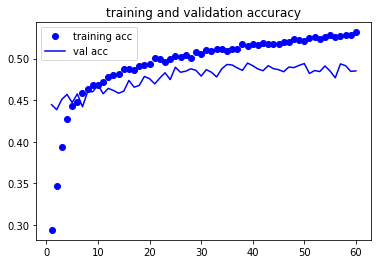

In [23]:
import matplotlib.pyplot as plt

acc = hist_word_vec.history['acc']
val_acc = hist_word_vec.history['val_acc']
loss = hist_word_vec.history['loss']
val_loss = hist_word_vec.history['val_loss']



epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='val acc')
plt.title('training and validation accuracy')
plt.legend()
plt.show()

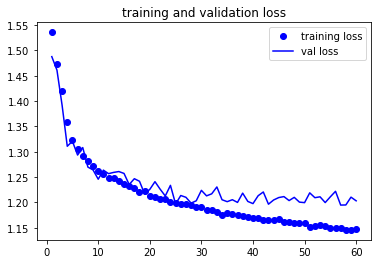

In [24]:
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='val loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [25]:
text = "i can't stand the kardashians omg"   
import re
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
text = remove_stopwords(text)
text = re.sub('@[\w]+','',text)
text = re.sub('=+','',text)
text = re.sub('[^a-zA-Z0-9 \n\.]', '', text)
text = gensim.utils.simple_preprocess(text)
print(text)


['cant', 'stand', 'kardashians', 'omg']


In [26]:
import sklearn.metrics
y_predict = network_wordvec.predict(x_val)
cr =  sklearn.metrics.classification_report( encoder.inverse_transform(y_predict), encoder.inverse_transform(y_val))
print(cr)

              precision    recall  f1-score   support

   happiness       0.38      0.23      0.29       546
        hate       0.27      0.43      0.33       249
        love       0.31      0.46      0.37       178
     sadness       0.23      0.50      0.31       739
       worry       0.74      0.54      0.62      3087

    accuracy                           0.49      4799
   macro avg       0.39      0.43      0.38      4799
weighted avg       0.58      0.49      0.51      4799

